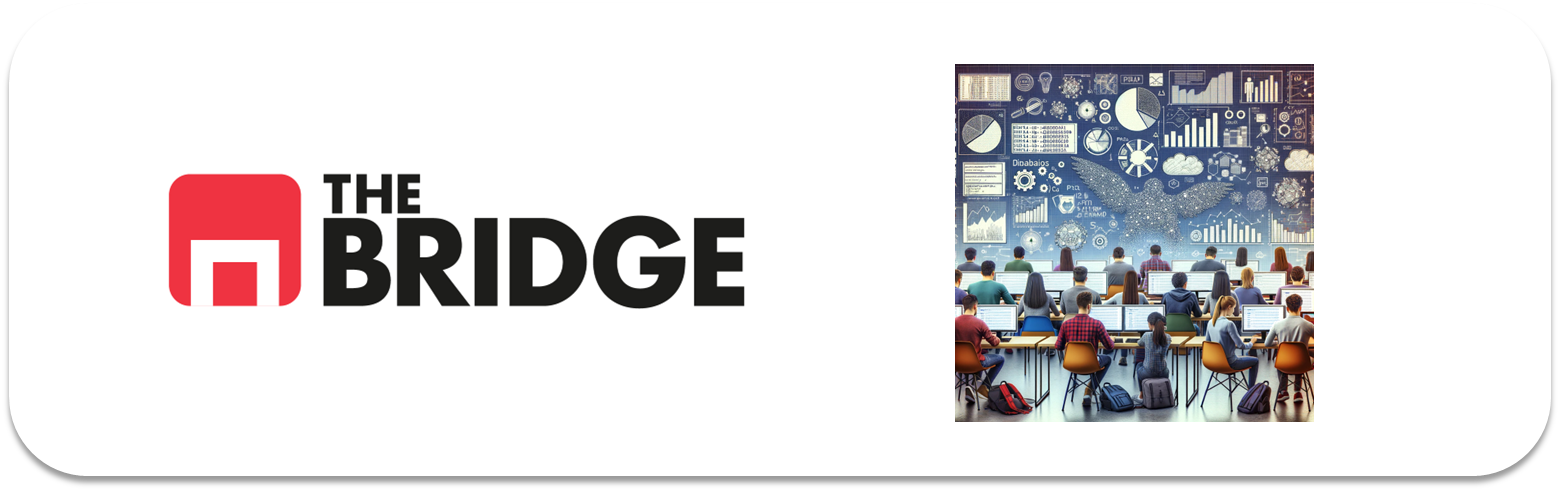

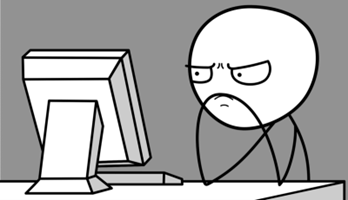

Para ejercitarte y afianzar lo aprendido sobre **Proceso de Datos**, como primera etapa de ML, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from bootcampviztools import pinta_distribucion_categoricas, plot_categorical_numerical_relationship, plot_grouped_histograms
from sklearn.model_selection import train_test_split


### Ejercicio 1

Carga el dataset de advertising que encontrarás en la carpeta de datos. Muestra su información general. ¿Qué te llama la atención? ¿Tendremos que limpiar alguna variable?

In [27]:
df_advertising = pd.read_csv("./data/advertising_ml.csv")
df_advertising.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35 years,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31 years,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26 years,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29 years,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35 años,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [28]:
df_advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   object 
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 78.3+ KB


In [29]:
df_advertising["Clicked on Ad"].value_counts()

Clicked on Ad
0    500
1    500
Name: count, dtype: int64

In [30]:
df_advertising["Male"].value_counts()

Male
0    519
1    481
Name: count, dtype: int64

In [31]:
# Age, tiene años y years, mejor eliminar referencias y convertir a numerica

### Ejercicio 2

Tenemos que entender el problema antes de seguir. Nos dicen que la compañía "QuickRespond" quiere poder generar un modelo que a partir de datos como los del dataset para poder dirigir mejor su campaña de anuncios. Hablando con ellos llegamos a la conclusión de que queremos un modelo para poder predecir si un usuario pulsará en el link de un anuncio o no. ¿Qué tipo de problemas estamos tratando?¿Y de que tipo de aprendizaje?¿Existe una variable target que puedas identificar rapidamente?

Objetivo del negocio: campaña publicitaria
Objetivo tecnico : modelo para predecir si un usuario pulsara en el link de una anuncio o no
Tipo de modelado (supervisado o no supervisado): supervisado
Features: pendiente
Target: Clicked on Ad
Tipo de problema(clasificacion, regresion, etc): clasificacion, si o no
Metrica de evaluacion: pendiente
Separacion Train-Test: pendiente

### Ejercicio 3

Volvamos ya a los datos. Intenta dar una definicón de cada columna, obten su cardinalidad y en función de esta y del tipo de variable de pandas, clasifícalas en categóricas y numéricas.

In [32]:
df_tipo = pd.DataFrame([df_advertising.nunique(),df_advertising.nunique()/len(df_advertising)*100,
                        df_advertising.dtypes]).T.rename(columns={0:"Card", 1:"% Card", 2:"Tipo"})
df_tipo

,Card,% Card,Tipo
Daily Time Spent on Site,900,90.0,float64
Age,83,8.3,object
Area Income,1000,100.0,float64
Daily Internet Usage,966,96.6,float64
Ad Topic Line,1000,100.0,object
City,969,96.9,object
Male,2,0.2,int64
Country,237,23.7,object
Timestamp,1000,100.0,object
Clicked on Ad,2,0.2,int64


|variable|definicion|cardinalidad|tipo variable|
|-|-|-|-|
|Daily Time Spend on Site|Tiempo que esta el usuario en el sitio web|90|Numerica continua|
|Age|Edad del usuario|8.3|Convertir a numerica disctreta, ahora es numero + year o año|
|Area Income|Ingresos del usuario en euros|100| Numerica continua|
|Daily Internet Usage|Uso de internet diario|96.6|Numerica continua|
|Ad Topic Line|Comentario del usuario|100|Categorica nominal|
|City|Ciudad del usuario|96.9|Categorica nominal|
|Male|Sexo masculino|0.2|Categorica nominal|
|Country|Pais del usuario|23.7|Categorica nominal|
|Timestamp|Dia y hora de entrada|100|Numerico temporal|
|Clicked on Ad| Clip en el anuncio|0.2|Categorica nominal|

### Ejercicio 4

Limpia las columnas que necesiten ser limpiadas, no completes nulos (porque asignar valores a nulos sólo puedes hacerlo primero con el train, ya explicaremos con detalle por qué). 

In [33]:
df_advertising['Age'] = df_advertising['Age'].str.extract(r'(\d+)').astype(int)
df_advertising.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


### Ejercicio 5

Divide el datset en train y test, empleando sklearn para ello tal y como hemos hecho en el workout. Usa la regla del 80-20

In [35]:
train_set, test_set = train_test_split(df_advertising, test_size=0.2, random_state=42)

print(len(train_set))
print(len(test_set))

800
200


### Ejercicio 6

Haz un pequeño análisis univariante de las columnas numéricas (muestra sus histogramas)

<function matplotlib.pyplot.show(close=None, block=None)>

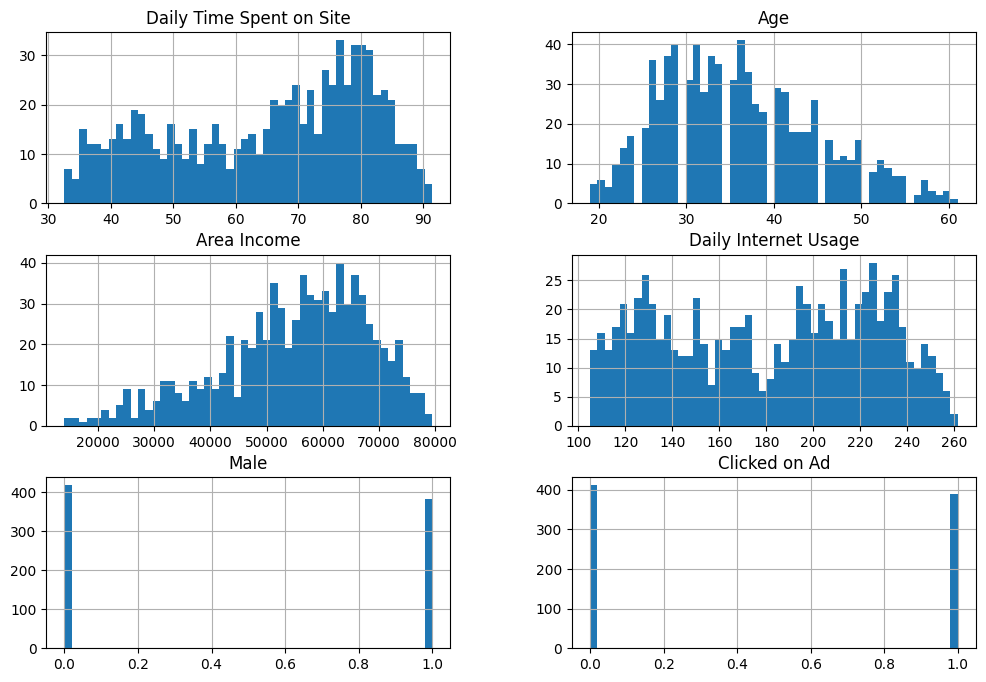

In [36]:
train_set.hist(bins=50, figsize=(12,8))
plt.show

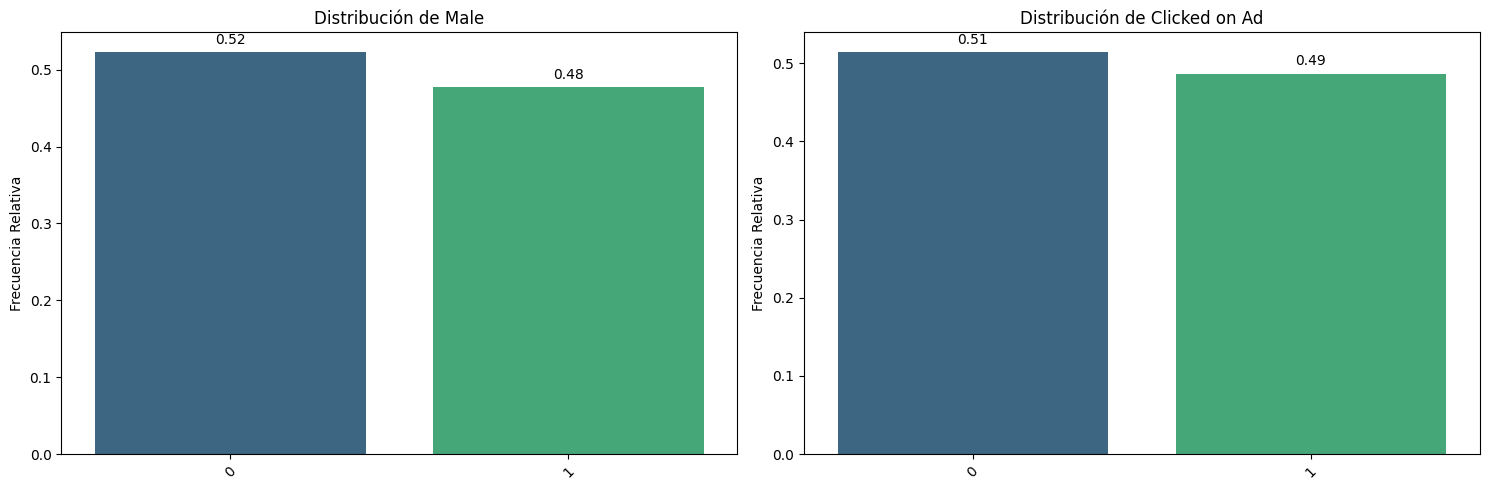

In [37]:
pinta_distribucion_categoricas(train_set, ["Male", "Clicked on Ad"], relativa=True, mostrar_valores=True)

### Ejercicio 7

Muestra las correlaciones de las variables continuas con un "PairPlot" y emplea como codigo de color la variable target. [Esto es otra forma de hacer un bivariante y un multivariante a la vez]. Para ello como argumento del pairplot de seaborn usa el dataframe de train (no la matriz de correlación)

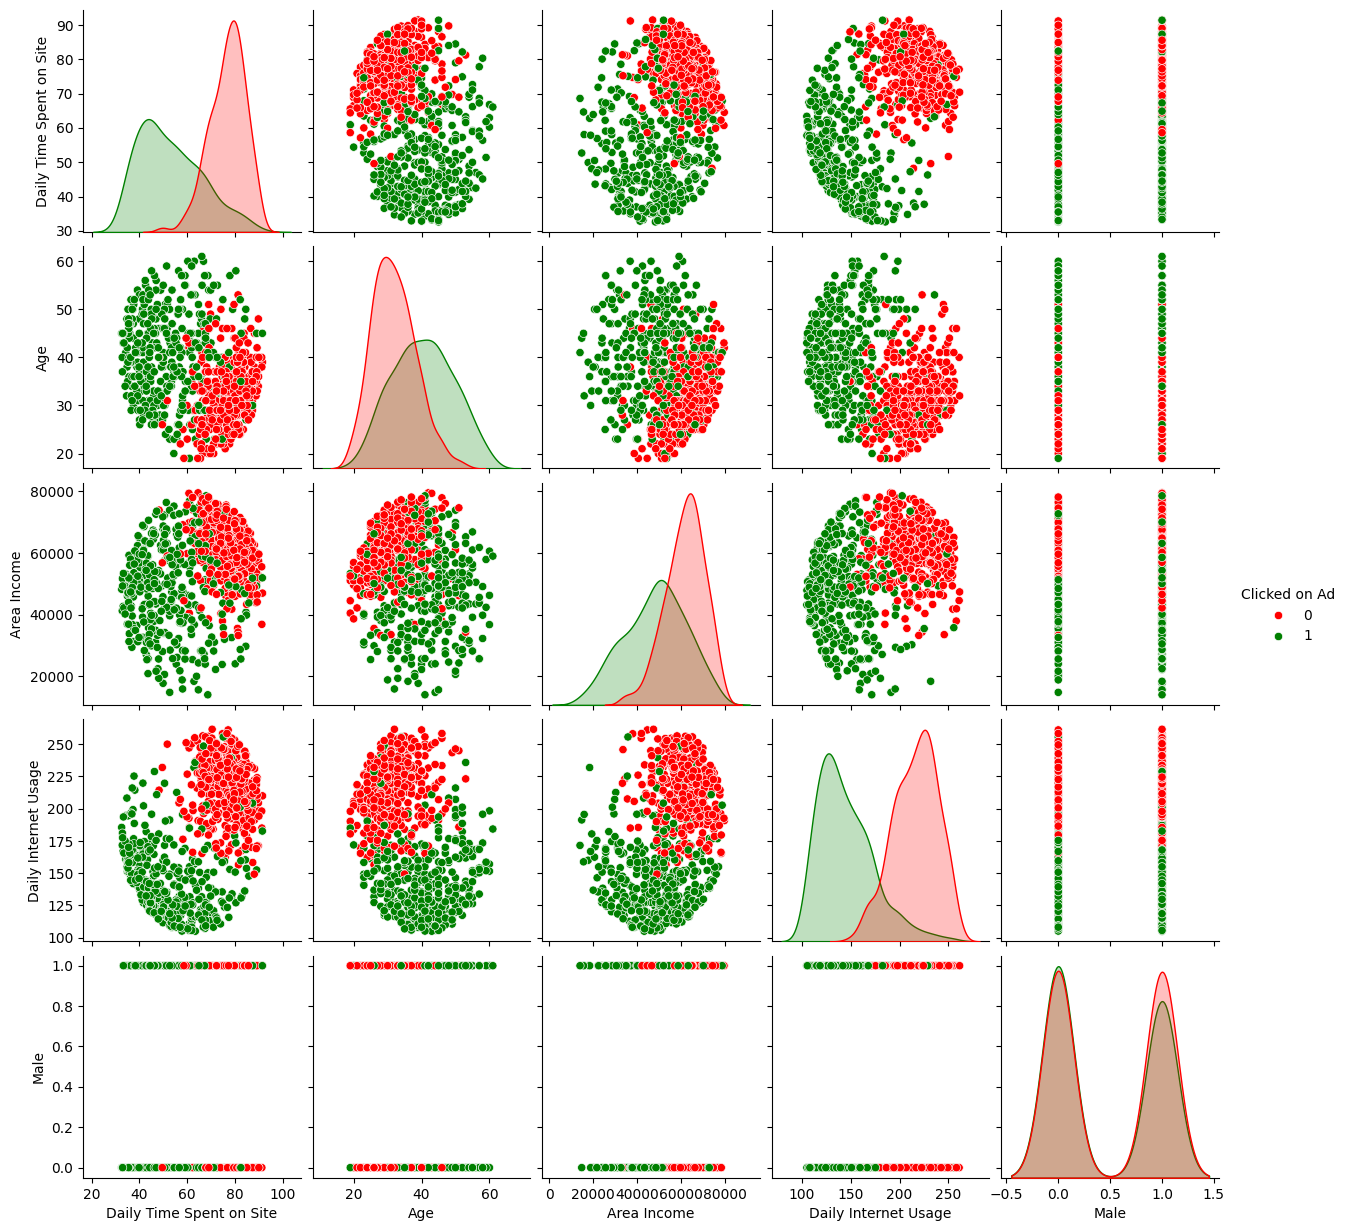

In [41]:
color= {0:"red", 1:"green"}
sns.pairplot(train_set, hue="Clicked on Ad",  palette=color);

### Ejercicio 8

Fijándote en la diagonal principal del gráfico anterior haz una selecció de features:

|variable|definicion|cardinalidad|tipo variable|Tipo|
|-|-|-|-|-|
|Daily Time Spend on Site|Tiempo que esta el usuario en el sitio web|90|Numerica continua|Feature|
|Age|Edad del usuario|8.3|Convertir a numerica disctreta, ahora es numero + year o año|Feature|
|Area Income|Ingresos del usuario en euros|100| Numerica continua|Feature|
|Daily Internet Usage|Uso de internet diario|96.6|Numerica continua|Feature|
|Ad Topic Line|Comentario del usuario|100|Categorica nominal|
|City|Ciudad del usuario|96.9|Categorica nominal|
|Male|Sexo masculino|0.2|Categorica nominal|
|Country|Pais del usuario|23.7|Categorica nominal|
|Timestamp|Dia y hora de entrada|100|Numerico temporal|
|Clicked on Ad| Clip en el anuncio|0.2|Categorica nominal|Target|